<a href="https://colab.research.google.com/github/Nadaramadan1/Elevvo-internship-projects/blob/main/Music_Genre_Classification_Description.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd

# Update the path to your dataset folder
DATASET_DIR = '/root/.cache/kagglehub/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/versions/1/Data'

# Load features from CSV files
features_30s = pd.read_csv(f'{DATASET_DIR}/features_30_sec.csv')
features_3s = pd.read_csv(f'{DATASET_DIR}/features_3_sec.csv')

# Preview the data
print(features_30s.head())
print(features_3s.head())

          filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.wav  661794          0.350088         0.088757  0.130228   
1  blues.00001.wav  661794          0.340914         0.094980  0.095948   
2  blues.00002.wav  661794          0.363637         0.085275  0.175570   
3  blues.00003.wav  661794          0.404785         0.093999  0.141093   
4  blues.00004.wav  661794          0.308526         0.087841  0.091529   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.002827             1784.165850          129774.064525   
1  0.002373             1530.176679          375850.073649   
2  0.002746             1552.811865          156467.643368   
3  0.006346             1070.106615          184355.942417   
4  0.002303             1835.004266          343399.939274   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              2002.449060            85882.761315  ...   52.420910   
1              2039.036516        

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("andradaolteanu/gtzan-dataset-music-genre-classification")

print("Path to dataset files:", path)

100%|██████████| 1.21G/1.21G [00:31<00:00, 42.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/versions/1


In [4]:
import os

# List files in the Data directory
data_dir_path = '/root/.cache/kagglehub/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/versions/1/Data'
if os.path.exists(data_dir_path):
    print(f"Files in {data_dir_path}:")
    for file in os.listdir(data_dir_path):
        print(file)
else:
    print(f"Directory not found: {data_dir_path}")

Files in /root/.cache/kagglehub/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/versions/1/Data:
features_3_sec.csv
genres_original
images_original
features_30_sec.csv


In [6]:
import os
import librosa

AUDIO_DIR = f'{DATASET_DIR}/genres_original'

# Example: Load one audio file
genre = 'rock'
filename = 'rock.00000.wav'
file_path = os.path.join(AUDIO_DIR, genre, filename)

y, sr = librosa.load(file_path, duration=30)
print(f'Audio loaded: {file_path}, Sample rate: {sr}, Length: {len(y)} samples')

Audio loaded: /root/.cache/kagglehub/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/versions/1/Data/genres_original/rock/rock.00000.wav, Sample rate: 22050, Length: 661500 samples


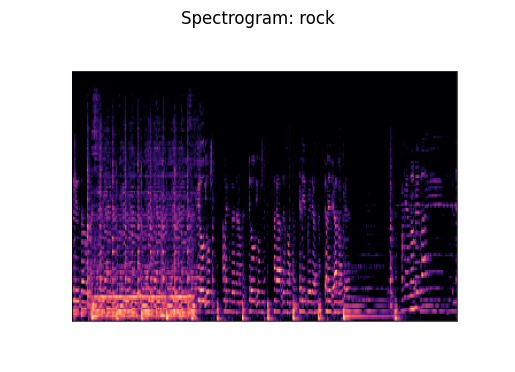

In [7]:
from PIL import Image
import matplotlib.pyplot as plt

IMAGE_DIR = f'{DATASET_DIR}/images_original'

# Example: Load one image
genre = 'rock'
image_file = 'rock00000.png'
image_path = os.path.join(IMAGE_DIR, genre, image_file)

img = Image.open(image_path)
plt.imshow(img)
plt.title(f'Spectrogram: {genre}')
plt.axis('off')
plt.show()


In [8]:
genres = os.listdir(AUDIO_DIR)

audio_paths = []
image_paths = []
labels = []

for genre in genres:
    genre_audio_dir = os.path.join(AUDIO_DIR, genre)
    genre_image_dir = os.path.join(IMAGE_DIR, genre)

    for file in os.listdir(genre_audio_dir):
        if file.endswith('.wav'):
            audio_paths.append(os.path.join(genre_audio_dir, file))
            image_name = file.replace('.wav', '.png')
            image_paths.append(os.path.join(genre_image_dir, image_name))
            labels.append(genre)


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Drop filename column and separate features/labels
X = features_30s.drop(columns=['filename', 'label'])
y = features_30s['label']

# Encode genre labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le.classes_))

              precision    recall  f1-score   support

       blues       0.63      0.85      0.72        20
   classical       1.00      1.00      1.00        13
     country       0.76      0.59      0.67        27
       disco       0.83      0.71      0.77        21
      hiphop       0.59      0.87      0.70        15
        jazz       0.95      0.91      0.93        22
       metal       0.86      0.96      0.91        25
         pop       0.75      0.69      0.72        13
      reggae       0.70      0.61      0.65        23
        rock       0.56      0.48      0.51        21

    accuracy                           0.76       200
   macro avg       0.76      0.77      0.76       200
weighted avg       0.76      0.76      0.75       200



In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_DIR = f'{DATASET_DIR}/images_original'

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = datagen.flow_from_directory(
    IMG_DIR,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    IMG_DIR,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 800 images belonging to 10 classes.
Found 199 images belonging to 10 classes.


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(train_gen.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_gen, validation_data=val_gen, epochs=10)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 991ms/step - accuracy: 0.1252 - loss: 3.2718 - val_accuracy: 0.3015 - val_loss: 2.2863
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 24s 958ms/step - accuracy: 0.2526 - loss: 2.2421 - val_accuracy: 0.3015 - val_loss: 2.0582
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 42s 982ms/step - accuracy: 0.3639 - loss: 1.8770 - val_accuracy: 0.3266 - val_loss: 1.8465
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.5241 - loss: 1.4143 - val_accuracy: 0.3618 - val_loss: 1.6835
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.7049 - loss: 1.0371 - val_accuracy: 0.4271 - val_loss: 1.6931
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.8170 - loss: 0.6526 - val_accuracy: 0.4422 - val_loss: 1.6687
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 25s 996ms/step - accuracy: 0.8560 - loss: 0.4858 - val_accuracy: 0.4774 - val_loss: 1.6533
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.9652 - loss: 0.1955 - val_accuracy: 0.4925

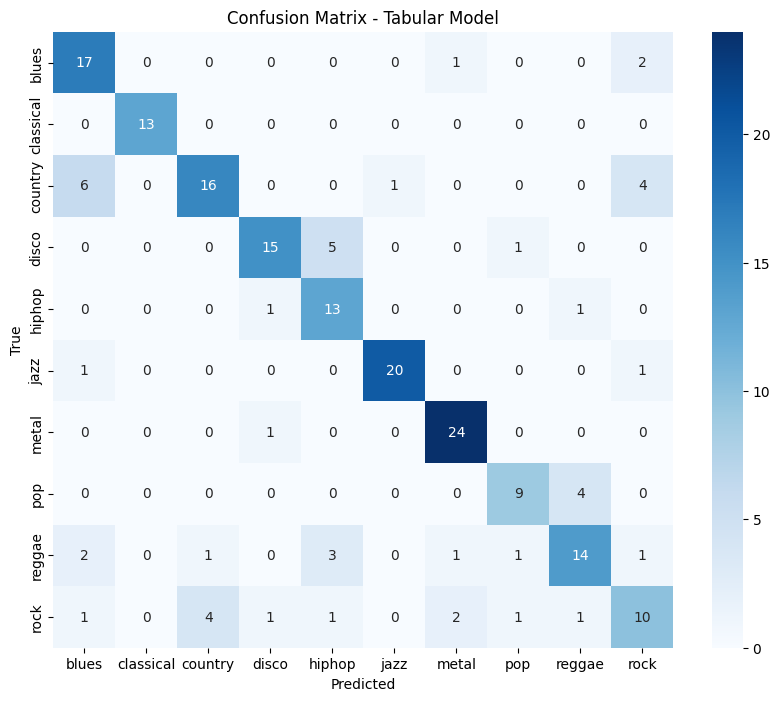

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.title('Confusion Matrix - Tabular Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [14]:
loss, accuracy = model.evaluate(val_gen)
print(f'CNN Validation Accuracy: {accuracy:.2f}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 323ms/step - accuracy: 0.4460 - loss: 2.1552
CNN Validation Accuracy: 0.48


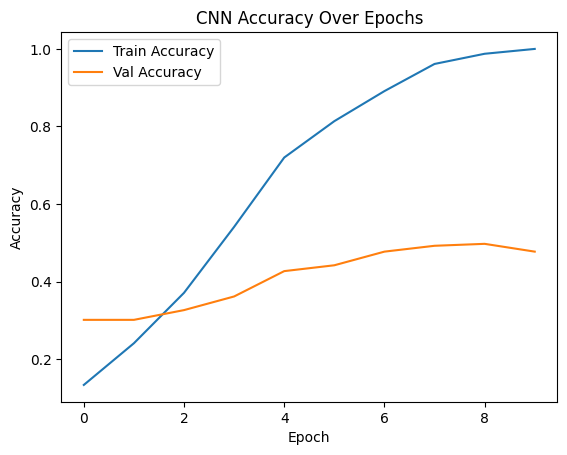

In [15]:
history = model.history.history

plt.plot(history['accuracy'], label='Train Accuracy')
plt.plot(history['val_accuracy'], label='Val Accuracy')
plt.title('CNN Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [16]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(train_gen.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_gen, validation_data=val_gen, epochs=10)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 200s 8s/step - accuracy: 0.0848 - loss: 2.4569 - val_accuracy: 0.1106 - val_loss: 2.2724
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 238s 10s/step - accuracy: 0.1669 - loss: 2.2624 - val_accuracy: 0.1809 - val_loss: 2.2078
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 197s 8s/step - accuracy: 0.2283 - loss: 2.1845 - val_accuracy: 0.2965 - val_loss: 2.1428
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 200s 8s/step - accuracy: 0.3106 - loss: 2.1186 - val_accuracy: 0.3116 - val_loss: 2.0759
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 239s 10s/step - accuracy: 0.3185 - loss: 2.0507 - val_accuracy: 0.2814 - val_loss: 2.0394
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 196s 8s/step - accuracy: 0.3450 - loss: 1.9751 - val_accuracy: 0.3668 - val_loss: 1.9684
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 197s 8s/step - accuracy: 0.3624 - loss: 1.9064 - val_accuracy: 0.3467 - val_loss: 1.9070
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 205s 8s/step - accur